In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx
import random 
from itertools import combinations, permutations
from math import comb
import sys

In [2]:
### Generate graphs

def gen_g(n):
    G = nx.Graph()
    eg = [(1,2)]
    G.add_edge(1, 2)

    new_node = 3
    while new_node <= n:
        random_e = random.choice(eg)
        eg.append((random_e[0], new_node))
        eg.append((random_e[1], new_node))
        new_node += 1

    G.add_edges_from(eg)
    return G


In [38]:
list(range(20))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [47]:


g_sizes = [5*10e3, 6*10e3, 5*10e4, 6*10e4, 5*10e5, 6*10e5]
ke_all = {}
he_all = {}
me_all = {}

for n in g_sizes:
    ke = []
    he = []
    me = []
    for i in list(range(20)):
        print("Calculating for graph", i, "of size", n)
        G = gen_g(n)
        ds = sorted(nx.degree_histogram(G),reverse = True)
        for deg_cnt in ds:
            deg += 1
            dt = (deg, deg_cnt)
            net.append(dt)
        ke.append(kernel_type_estimator(ds, 100))
        he.append(hill_estimator(ds))
        me.append(moments_estimator(ds))
    ke_all[n] = ke
    he_all[n] = he
    me_all[n] = me
    

Calculating for graph 0 of size 50000.0


/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_16258/116658171.py:28: RuntimeWarning: divide by zero encountered in log
  logs = np.log(ordered_data)
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_16258/116658171.py:29: RuntimeWarning: invalid value encountered in subtract
  differences = logs[:-1] - logs[1:]
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_16258/116658171.py:85: RuntimeWarning: divide by zero encountered in log
  logs = np.log(ordered_data)
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_16258/116658171.py:86: RuntimeWarning: invalid value encountered in subtract
  differences = logs[:-1] - logs[1:]
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_16258/116658171.py:58: RuntimeWarning: invalid value encountered in true_divide
  xi_arr = gamma_pos -1. + q2/q1
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_16258/116658171.py:121: RuntimeWarning: invalid value encountered in true_divide
  xi_arr = gamma_p

Calculating for graph 1 of size 50000.0
Calculating for graph 2 of size 50000.0


/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_16258/3079702889.py:87: RuntimeWarning: divide by zero encountered in true_divide
  |(np.abs(1.-(M1*M2)/M3) < 1e-10))
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_16258/3079702889.py:86: RuntimeWarning: divide by zero encountered in true_divide
  clean_indices = np.where((M2 <= 0) | (M3 == 0) | (np.abs(1.-(M1**2)/M2) < 1e-10)\


Calculating for graph 3 of size 50000.0
WARNING(moments): estimated k2 is greater than k1! Re-doing bootstrap...
Resampling...
Calculating for graph 4 of size 50000.0
Calculating for graph 5 of size 50000.0
Calculating for graph 6 of size 50000.0
Calculating for graph 7 of size 50000.0
Calculating for graph 8 of size 50000.0
Calculating for graph 9 of size 50000.0
Calculating for graph 10 of size 50000.0
Calculating for graph 11 of size 50000.0
Calculating for graph 12 of size 50000.0
Calculating for graph 13 of size 50000.0
Calculating for graph 14 of size 50000.0
Calculating for graph 15 of size 50000.0
WARNING(moments): estimated k2 is greater than k1! Re-doing bootstrap...
Resampling...
Calculating for graph 16 of size 50000.0
Calculating for graph 17 of size 50000.0
Calculating for graph 18 of size 50000.0
Calculating for graph 19 of size 50000.0
Calculating for graph 0 of size 60000.0
Calculating for graph 1 of size 60000.0
Calculating for graph 2 of size 60000.0
Calculating for 

/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_16258/997918134.py:231: RuntimeWarning: divide by zero encountered in reciprocal
  xi_arr = M1 + 1. - 0.5*(1. - (M1*M1)/M2)**(-1)


Calculating for graph 19 of size 6000000.0


In [68]:
# ke_all = pd.DataFrame(ke_all)
# ke_des = ke_all.describe()
ke_dt = ke_des.loc[['mean', 'std'], :].T
ke_dt

,mean,std
50000.0,1.449636,0.023522
60000.0,1.455284,0.049479
500000.0,1.391590,0.007680
600000.0,1.390844,0.013116
5000000.0,1.368401,0.010804
6000000.0,1.364932,0.004883


In [63]:
# me_all = pd.DataFrame(me_all)
# me_des = me_all.describe()
me_dt = me_des.loc[['mean', 'std'], :].T
me_dt

,mean,std
50000.0,1.440563,0.025321
60000.0,1.423854,0.018213
500000.0,1.382500,0.009921
600000.0,1.376129,0.012674
5000000.0,1.360003,0.009855
6000000.0,1.359825,0.009399


In [73]:
# he_all = pd.DataFrame(me_all)
# he_des = he_all.describe()
he_dt = he_des.loc[['mean', 'std'], :].T
he_dt

,mean,std
50000.0,1.440563,0.025321
60000.0,1.423854,0.018213
500000.0,1.382500,0.009921
600000.0,1.376129,0.012674
5000000.0,1.360003,0.009855
6000000.0,1.359825,0.009399


Text(0.5, 1.0, 'Compare three tail estimation on 6 graphs of different sizes')

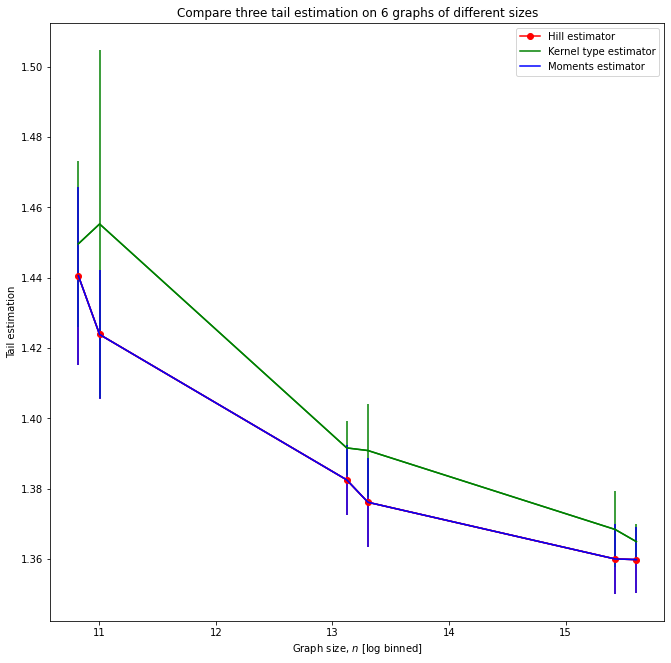

In [84]:
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111)
ax.plot(np.log(g_sizes), he_dt['mean'].values, color = 'r', marker = 'o', label = 'Hill estimator')
plt.errorbar(np.log(g_sizes), he_dt['mean'].values, yerr=he_dt['std'].values, color = 'r')
ax.plot(np.log(g_sizes), ke_dt['mean'].values, color = 'g', label = 'Kernel type estimator')
plt.errorbar(np.log(g_sizes), ke_dt['mean'].values, yerr=ke_dt['std'].values, color = 'g')
ax.plot(np.log(g_sizes), me_dt['mean'].values, color = 'b', label = 'Moments estimator')
plt.errorbar(np.log(g_sizes), me_dt['mean'].values, yerr=me_dt['std'].values, color = 'b')
ax.set_xlabel('Graph size, $n$ [log binned]')
ax.set_ylabel('Tail estimation')
ax.legend()
plt.title('Compare three tail estimation on 6 graphs of different sizes')

auxiliary codes hidden vvv

In [36]:
import sys
import time
import argparse
import os
import warnings
import numpy as np
from matplotlib import pyplot as plt

# sequence_file_path = os.getcwd()+'sth.txt'
# output_file_path = os.getcwd()+'sth.pdf'

# =========================================
# ========== Auxiliary Functions ==========
# =========================================

def add_uniform_noise(data_sequence, p = 1):
    """
    Function to add uniform random noise to a given dataset.
    Uniform noise in range [-5*10^(-p), 5*10^(-p)] is added to each
    data entry. For integer-valued sequences, p = 1.

    Args:
        data_sequence: numpy array of data to be processed.
        p: integer parameter controlling noise amplitude.

    Returns:
        numpy array with noise-added entries.
    """
    if p < 1:
        print("Parameter p should be greater or equal to 1.")
        return None
    noise = np.random.uniform(-5.*10**(-p), 5*10**(-p), size = len(data_sequence))
    randomized_data_sequence = data_sequence + noise
    # ensure there are no negative entries after noise is added
    randomized_data_sequence = randomized_data_sequence[np.where(randomized_data_sequence > 0)]
    return randomized_data_sequence


def get_distribution(data_sequence, number_of_bins = 30):
    """
    Function to get a log-binned distribution of a given dataset.

    Args:
        data_sequence: numpy array with data to calculate
                       log-binned PDF on.
        number_of_bins: number of logarithmic bins to use.

    Returns:
        x, y: numpy arrays containing midpoints of bins
              and corresponding PDF values.

    """
    # define the support of the distribution
    lower_bound = min(data_sequence)
    upper_bound = max(data_sequence)
    # define bin edges
    log = np.log10
    lower_bound = log(lower_bound) if lower_bound > 0 else -1
    upper_bound = log(upper_bound)
    bins = np.logspace(lower_bound, upper_bound, number_of_bins)
    
    # compute the histogram using numpy
    y, __ = np.histogram(data_sequence, bins = bins, density = True)
    # for each bin, compute its midpoint
    x = bins[1:] - np.diff(bins) / 2.0
    # if bin is empty, drop it from the resulting list
    drop_indices = [i for i,k in enumerate(y) if k == 0.0]
    x = [k for i,k in enumerate(x) if i not in drop_indices]
    y = [k for i,k in enumerate(y) if i not in drop_indices]
    return x, y

def get_ccdf(degree_sequence):
    """
    Function to get CCDF of the list of degrees.
    
    Args:
        degree_sequence: numpy array of nodes' degrees.

    Returns:
        uniques: unique degree values met in the sequence.
        1-CDF: CCDF values corresponding to the unique values
               from the 'uniques' array.
    """
    uniques, counts = np.unique(degree_sequence, return_counts=True)
    cumprob = np.cumsum(counts).astype(np.double) / (degree_sequence.size)
    return uniques[::-1], (1. - cumprob)[::-1]
    


##### Hill

In [41]:
# ================================================
# ========== Hill Tail Index Estimation ==========
# ================================================
def get_moments_estimates_1(ordered_data):
    """
    Function to calculate first moments array given an ordered data
    sequence. Decreasing ordering is required.

    Args:
        ordered_data: numpy array of ordered data for which
                      the 1st moment (Hill estimator)
                      is calculated.
    Returns:
        M1: numpy array of 1st moments (Hill estimator)
            corresponding to all possible order statistics
            of the dataset.

    """
    logs_1 = np.log(ordered_data)
    logs_1_cumsum = np.cumsum(logs_1[:-1])
    k_vector = np.arange(1, len(ordered_data))
    M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
    return M1

def get_moments_estimates_2(ordered_data):
    """
    Function to calculate first and second moments arrays
    given an ordered data sequence. 
    Decreasing ordering is required.

    Args:
        ordered_data: numpy array of ordered data for which
                      the 1st (Hill estimator) and 2nd moments 
                      are calculated.
    Returns:
        M1: numpy array of 1st moments (Hill estimator)
            corresponding to all possible order statistics
            of the dataset.
        M2: numpy array of 2nd moments corresponding to all 
            possible order statistics of the dataset.

    """
    logs_1 = np.log(ordered_data)
    logs_2 = (np.log(ordered_data))**2
    logs_1_cumsum = np.cumsum(logs_1[:-1])
    logs_2_cumsum = np.cumsum(logs_2[:-1])
    k_vector = np.arange(1, len(ordered_data))
    M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
    M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
         + logs_2[1:]
    return M1, M2

def get_moments_estimates_3(ordered_data):
    """
    Function to calculate first, second and third moments 
    arrays given an ordered data sequence. 
    Decreasing ordering is required.

    Args:
        ordered_data: numpy array of ordered data for which
                      the 1st (Hill estimator), 2nd and 3rd moments 
                      are calculated.
    Returns:
        M1: numpy array of 1st moments (Hill estimator)
            corresponding to all possible order statistics
            of the dataset.
        M2: numpy array of 2nd moments corresponding to all 
            possible order statistics of the dataset.
        M3: numpy array of 3rd moments corresponding to all 
            possible order statistics of the dataset.

    """
    logs_1 = np.log(ordered_data)
    logs_2 = (np.log(ordered_data))**2
    logs_3 = (np.log(ordered_data))**3
    logs_1_cumsum = np.cumsum(logs_1[:-1])
    logs_2_cumsum = np.cumsum(logs_2[:-1])
    logs_3_cumsum = np.cumsum(logs_3[:-1])
    k_vector = np.arange(1, len(ordered_data))
    M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
    M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
         + logs_2[1:]
    M3 = (1./k_vector)*logs_3_cumsum - (3.*logs_1[1:]/k_vector)*logs_2_cumsum\
         + (3.*logs_2[1:]/k_vector)*logs_1_cumsum - logs_3[1:]
    # cleaning exceptional cases
    clean_indices = np.where((M2 <= 0) | (M3 == 0) | (np.abs(1.-(M1**2)/M2) < 1e-10)\
                             |(np.abs(1.-(M1*M2)/M3) < 1e-10))
    M1[clean_indices] = np.nan
    M2[clean_indices] = np.nan
    M3[clean_indices] = np.nan
    return M1, M2, M3

def hill_dbs(ordered_data, t_bootstrap = 0.5,
            r_bootstrap = 500, eps_stop = 1.0,
            verbose = False, diagn_plots = False):
    """
        Function to perform double-bootstrap procedure for
        Hill estimator.

        Args:
            ordered_data: numpy array for which double-bootstrap
                          is performed. Decreasing ordering is required.
            t_bootstrap:  parameter controlling the size of the 2nd
                          bootstrap. Defined from n2 = n*(t_bootstrap).
            r_bootstrap:  number of bootstrap resamplings for the 1st and 2nd
                          bootstraps.
            eps_stop:     parameter controlling range of AMSE minimization.
                          Defined as the fraction of order statistics to consider
                          during the AMSE minimization step.
            verbose:      flag controlling bootstrap verbosity. 
            diagn_plots:  flag to switch on/off generation of AMSE diagnostic
                          plots.

        Returns:
            k_star:     number of order statistics optimal for estimation
                        according to the double-bootstrap procedure.
            x1_arr:     array of fractions of order statistics used for the
                        1st bootstrap sample.
            n1_amse:    array of AMSE values produced by the 1st bootstrap
                        sample.
            k1_min:     value of fraction of order statistics corresponding
                        to the minimum of AMSE for the 1st bootstrap sample.
            max_index1: index of the 1st bootstrap sample's order statistics
                        array corresponding to the minimization boundary set
                        by eps_stop parameter.
            x2_arr:     array of fractions of order statistics used for the
                        2nd bootstrap sample.
            n2_amse:    array of AMSE values produced by the 2nd bootstrap
                        sample.
            k2_min:     value of fraction of order statistics corresponding
                        to the minimum of AMSE for the 2nd bootstrap sample.
            max_index2: index of the 2nd bootstrap sample's order statistics
                        array corresponding to the minimization boundary set
                        by eps_stop parameter.

    """
    if verbose:
        print("Performing Hill double-bootstrap...")
    n = len(ordered_data)
    eps_bootstrap = 0.5*(1+np.log(int(t_bootstrap*n))/np.log(n))
    n1 = int(n**eps_bootstrap)
    samples_n1 = np.zeros(n1-1)
    good_counts1 = np.zeros(n1-1)
    k1 = None
    k2 = None
    min_index1 = 1
    min_index2 = 1
    while k2 == None:
        # first bootstrap with n1 sample size
        for i in range(r_bootstrap):
            sample = np.random.choice(ordered_data, n1, replace = True)
            sample[::-1].sort()
            M1, M2 = get_moments_estimates_2(sample)
            current_amse1 = (M2 - 2.*(M1)**2)**2
            samples_n1 += current_amse1
            good_counts1[np.where(current_amse1 != np.nan)] += 1
        averaged_delta = samples_n1 / good_counts1
        
        max_index1 = (np.abs(np.linspace(1./n1, 1.0, n1) - eps_stop)).argmin()
        k1 = np.nanargmin(averaged_delta[min_index1:max_index1]) + 1 + min_index1 #take care of indexing
        if diagn_plots:
            n1_amse = averaged_delta
            x1_arr = np.linspace(1./n1, 1.0, n1)
        
        # second bootstrap with n2 sample size
        n2 = int(n1*n1/float(n))
        samples_n2 = np.zeros(n2-1)
        good_counts2 = np.zeros(n2-1)
    
        for i in range(r_bootstrap):
            sample = np.random.choice(ordered_data, n2, replace = True)
            sample[::-1].sort()
            M1, M2 = get_moments_estimates_2(sample)
            current_amse2 = (M2 - 2.*(M1**2))**2
            samples_n2 += current_amse2
            good_counts2[np.where(current_amse2 != np.nan)] += 1
        max_index2 = (np.abs(np.linspace(1./n2, 1.0, n2) - eps_stop)).argmin()
        averaged_delta = samples_n2 / good_counts2
        
        
        k2 = np.nanargmin(averaged_delta[min_index2:max_index2]) + 1 + min_index2 #take care of indexing
        if diagn_plots:
            n2_amse = averaged_delta
            x2_arr = np.linspace(1./n2, 1.0, n2)

        if k2 > k1:
#             print("Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...")
            # move left AMSE boundary to avoid numerical issues
            min_index1 = min_index1 + int(0.005*n)
            min_index2 = min_index2 + int(0.005*n)
            k2 = None
    
    '''
    # this constant is provided in the Danielsson's paper
    # use instead of rho below if needed
    rho = (np.log(k1)/(2.*np.log(n1) - np.log(k1)))\
          **(2.*(np.log(n1) - np.log(k1))/(np.log(n1)))
    '''
    
    # this constant is provided in Qi's paper
    rho = (1. - (2*(np.log(k1) - np.log(n1))/(np.log(k1))))**(np.log(k1)/np.log(n1) - 1.)
    
    k_star = (k1*k1/float(k2)) * rho
    k_star = int(np.round(k_star))
    
    # enforce k_star to pick 2nd value (rare cases of extreme cutoffs)
    if k_star == 0:
        k_star = 2
    if int(k_star) >= len(ordered_data):
#         print("WARNING: estimated threshold k is larger than the size of data")
        k_star = len(ordered_data)-1
    if verbose:
        print("--- Hill double-bootstrap information ---")
        print("Size of the 1st bootstrap sample n1:", n1)
        print("Size of the 2nd bootstrap sample n2:", n2)
        print("Estimated k1:", k1)
        print("Estimated k2:", k2)
        print("Estimated constant rho:", rho)
        print("Estimated optimal k:", k_star)
        print("-----------------------------------------")
    if not diagn_plots:
        x1_arr, x2_arr, n1_amse, n2_amse = None, None, None, None
    return k_star, x1_arr, n1_amse, k1/float(n1), max_index1, x2_arr, n2_amse, k2/float(n2), max_index2

def hill_estimator(ordered_data,
                   bootstrap = True, t_bootstrap = 0.5,
                   r_bootstrap = 500, verbose = False,
                   diagn_plots = False, eps_stop = 0.99):
    """
    Function to calculate Hill estimator for a given dataset.
    If bootstrap flag is True, double-bootstrap procedure
    for estimation of the optimal number of order statistics is
    performed.

    Args:
        ordered_data: numpy array for which tail index estimation
                      is performed. Decreasing ordering is required.
        bootstrap:    flag to switch on/off double-bootstrap procedure.
        t_bootstrap:  parameter controlling the size of the 2nd
                      bootstrap. Defined from n2 = n*(t_bootstrap).
        r_bootstrap:  number of bootstrap resamplings for the 1st and 2nd
                      bootstraps.
        eps_stop:     parameter controlling range of AMSE minimization.
                      Defined as the fraction of order statistics to consider
                      during the AMSE minimization step.
        verbose:      flag controlling bootstrap verbosity. 
        diagn_plots:  flag to switch on/off generation of AMSE diagnostic
                      plots.

    Returns:
        results: list containing an array of order statistics,
                 an array of corresponding tail index estimates,
                 the optimal order statistic estimated by double-
                 bootstrap and the corresponding tail index,
                 an array of fractions of order statistics used for
                 the 1st bootstrap sample with an array of corresponding
                 AMSE values, value of fraction of order statistics
                 corresponding to the minimum of AMSE for the 1st bootstrap
                 sample, index of the 1st bootstrap sample's order statistics
                 array corresponding to the minimization boundary set
                 by eps_stop parameter; and the same characteristics for the
                 2nd bootstrap sample.
    """
    k_arr = np.arange(1, len(ordered_data))
    xi_arr = get_moments_estimates_1(ordered_data)
    if bootstrap:
        results = hill_dbs(ordered_data,
                           t_bootstrap = t_bootstrap,
                           r_bootstrap = r_bootstrap,
                           verbose = verbose, 
                           diagn_plots = diagn_plots,
                           eps_stop = eps_stop)
        k_star, x1_arr, n1_amse, k1, max_index1, x2_arr, n2_amse, k2, max_index2 = results
        while k_star == None:
            print("Resampling...")
            results = hill_dbs(ordered_data,
                           t_bootstrap = t_bootstrap,
                           r_bootstrap = r_bootstrap,
                           verbose = verbose, 
                           diagn_plots = diagn_plots,
                           eps_stop = eps_stop)
            k_star, x1_arr, n1_amse, k1, max_index1, x2_arr, n2_amse, k2, max_index2 = results
        xi_star = xi_arr[k_star-1]
#         print("Adjusted Hill estimated gamma:", 1 + 1./xi_star)
#         print("**********")
    else:
        k_star, xi_star = None, None
        x1_arr, n1_amse, k1, max_index1 = 4*[None]
        x2_arr, n2_amse, k2, max_index2 = 4*[None]
    results = [k_arr, xi_arr, k_star, xi_star, x1_arr, n1_amse, k1, max_index1,\
               x2_arr, n2_amse, k2, max_index2]
    return 1 + 1./xi_star

def smooth_hill_estimator(ordered_data, r_smooth = 2):
    """
    Function to calculate smooth Hill estimator for a
    given ordered dataset.

    Args:
        ordered_data: numpy array for which tail index estimation
                      is performed. Decreasing ordering is required.
        r_smooth:     integer parameter controlling the width
                      of smoothing window. Typically small
                      value such as 2 or 3.
    Returns:
        k_arr:  numpy array of order statistics based on the data provided.
        xi_arr: numpy array of tail index estimates corresponding to 
                the order statistics array k_arr.
    """
    n = len(ordered_data)
    M1 = get_moments_estimates_1(ordered_data)
    xi_arr = np.zeros(int(np.floor(float(n)/r_smooth)))
    k_arr = np.arange(1, int(np.floor(float(n)/r_smooth))+1)
    xi_arr[0] = M1[0]
    bin_lengths = np.array([1.]+[float((r_smooth-1)*k) for k in k_arr[:-1]])
    cum_sum = 0.0
    for i in range(1, r_smooth*int(np.floor(float(n)/r_smooth))-1):
        k = i
        cum_sum += M1[k]
        if (k+1) % (r_smooth) == 0:
            xi_arr[int(k+1)//int(r_smooth)] = cum_sum
            cum_sum -= M1[int(k+1)//int(r_smooth)]
    xi_arr = xi_arr/bin_lengths
    return k_arr, xi_arr


##### Moments

In [40]:

# ===================================================
# ========== Moments Tail Index Estimation ==========
# ===================================================

def moments_dbs_prefactor(xi_n, n1, k1):
    """ 
    Function to calculate pre-factor used in moments
    double-bootstrap procedure.

    Args:
        xi_n: moments tail index estimate corresponding to
              sqrt(n)-th order statistic.
        n1:   size of the 1st bootstrap in double-bootstrap
              procedure.
        k1:   estimated optimal order statistic based on the 1st
              bootstrap sample.

    Returns:
        prefactor: constant used in estimation of the optimal
                   stopping order statistic for moments estimator.
    """
    def V_sq(xi_n):
        if xi_n >= 0:
            V = 1. + (xi_n)**2
            return V
        else:
            a = (1.-xi_n)**2
            b = (1-2*xi_n)*(6*((xi_n)**2)-xi_n+1)
            c = (1.-3*xi_n)*(1-4*xi_n)
            V = a*b/c
            return V

    def V_bar_sq(xi_n):
        if xi_n >= 0:
            V = 0.25*(1+(xi_n)**2)
            return V
        else:
            a = 0.25*((1-xi_n)**2)
            b = 1-8*xi_n+48*(xi_n**2)-154*(xi_n**3)
            c = 263*(xi_n**4)-222*(xi_n**5)+72*(xi_n**6)
            d = (1.-2*xi_n)*(1-3*xi_n)*(1-4*xi_n)
            e = (1.-5*xi_n)*(1-6*xi_n)
            V = a*(b+c)/(d*e)
            return V
    
    def b(xi_n, rho):
        if xi_n < rho:
            a1 = (1.-xi_n)*(1-2*xi_n)
            a2 = (1.-rho-xi_n)*(1.-rho-2*xi_n)
            return a1/a2
        elif xi_n >= rho and xi_n < 0:
            return 1./(1-xi_n)
        else:
            b = (xi_n/(rho*(1.-rho))) + (1./((1-rho)**2))
            return b

    def b_bar(xi_n, rho):
        if xi_n < rho:
            a1 = 0.5*(-rho*(1-xi_n)**2)
            a2 = (1.-xi_n-rho)*(1-2*xi_n-rho)*(1-3*xi_n-rho)
            return a1/a2
        elif xi_n >= rho and xi_n < 0:
            a1 = 1-2*xi_n-np.sqrt((1-xi_n)*(1-2.*xi_n))
            a2 = (1.-xi_n)*(1-2*xi_n)
            return a1/a2
        else:
            b = (-1.)*((rho + xi_n*(1-rho))/(2*(1-rho)**3))
            return b

    rho = np.log(k1)/(2*np.log(k1) - 2.*np.log(n1))
    a = (V_sq(xi_n)) * (b_bar(xi_n, rho)**2)
    b = V_bar_sq(xi_n) * (b(xi_n, rho)**2)
    prefactor = (a/b)**(1./(1. - 2*rho))
    return prefactor

def moments_dbs(ordered_data, xi_n, t_bootstrap = 0.5,
                r_bootstrap = 500, eps_stop = 1.0,
                verbose = False, diagn_plots = False):
    """
    Function to perform double-bootstrap procedure for 
    moments estimator.

    Args:
        ordered_data: numpy array for which double-bootstrap
                      is performed. Decreasing ordering is required.
        xi_n:         moments tail index estimate corresponding to
                      sqrt(n)-th order statistic.
        t_bootstrap:  parameter controlling the size of the 2nd
                      bootstrap. Defined from n2 = n*(t_bootstrap).
        r_bootstrap:  number of bootstrap resamplings for the 1st and 2nd
                      bootstraps.
        eps_stop:     parameter controlling range of AMSE minimization.
                      Defined as the fraction of order statistics to consider
                      during the AMSE minimization step.
        verbose:      flag controlling bootstrap verbosity. 
        diagn_plots:  flag to switch on/off generation of AMSE diagnostic
                      plots.
        

    Returns:
        k_star:     number of order statistics optimal for estimation
                    according to the double-bootstrap procedure.
        x1_arr:     array of fractions of order statistics used for the
                    1st bootstrap sample.
        n1_amse:    array of AMSE values produced by the 1st bootstrap
                    sample.
        k1_min:     value of fraction of order statistics corresponding
                    to the minimum of AMSE for the 1st bootstrap sample.
        max_index1: index of the 1st bootstrap sample's order statistics
                    array corresponding to the minimization boundary set
                    by eps_stop parameter.
        x2_arr:     array of fractions of order statistics used for the
                    2nd bootstrap sample.
        n2_amse:    array of AMSE values produced by the 2nd bootstrap
                    sample.
        k2_min:     value of fraction of order statistics corresponding
                    to the minimum of AMSE for the 2nd bootstrap sample.
        max_index2: index of the 2nd bootstrap sample's order statistics
                    array corresponding to the minimization boundary set
                    by eps_stop parameter.
    """
    if verbose:
        print("Performing moments double-bootstrap...")
    n = len(ordered_data)
    eps_bootstrap = 0.5*(1+np.log(int(t_bootstrap*n))/np.log(n))

    # first bootstrap with n1 sample size
    n1 = int(n**eps_bootstrap)
    samples_n1 = np.zeros(n1-1)
    good_counts1 = np.zeros(n1-1)
    for i in range(r_bootstrap):
        sample = np.random.choice(ordered_data, n1, replace = True)
        sample[::-1].sort()
        M1, M2, M3 = get_moments_estimates_3(sample)
        xi_2 = M1 + 1. - 0.5*((1. - (M1*M1)/M2))**(-1.)
        xi_3 = np.sqrt(0.5*M2) + 1. - (2./3.)*(1. / (1. - M1*M2/M3))
        samples_n1 += (xi_2 - xi_3)**2
        good_counts1[np.where((xi_2 - xi_3)**2 != np.nan)] += 1
    max_index1 = (np.abs(np.linspace(1./n1, 1.0, n1) - eps_stop)).argmin()
    averaged_delta = samples_n1 / good_counts1
    k1 = np.nanargmin(averaged_delta[:max_index1]) + 1 #take care of indexing
    if diagn_plots:
        n1_amse = averaged_delta
        x1_arr = np.linspace(1./n1, 1.0, n1)
    

    #r second bootstrap with n2 sample size
    n2 = int(n1*n1/float(n))
    samples_n2 = np.zeros(n2-1)
    good_counts2 = np.zeros(n2-1)
    for i in range(r_bootstrap):
        sample = np.random.choice(ordered_data, n2, replace = True)
        sample[::-1].sort()
        M1, M2, M3 = get_moments_estimates_3(sample)
        xi_2 = M1 + 1. - 0.5*(1. - (M1*M1)/M2)**(-1.)
        xi_3 = np.sqrt(0.5*M2) + 1. - (2./3.)*(1. / (1. - M1*M2/M3))
        samples_n2 += (xi_2 - xi_3)**2
        good_counts2[np.where((xi_2 - xi_3)**2 != np.nan)] += 1
    max_index2 = (np.abs(np.linspace(1./n2, 1.0, n2) - eps_stop)).argmin()
    averaged_delta = samples_n2 / good_counts2
    k2 = np.nanargmin(averaged_delta[:max_index2]) + 1 #take care of indexing
    if diagn_plots:
        n2_amse = averaged_delta
        x2_arr = np.linspace(1./n2, 1.0, n2)
    
    if k2 > k1:
        print("WARNING(moments): estimated k2 is greater than k1! Re-doing bootstrap...") 
        return 9*[None]
    
    #calculate estimated optimal stopping k
    prefactor = moments_dbs_prefactor(xi_n, n1, k1)
    k_star = int((k1*k1/float(k2)) * prefactor)

    if int(k_star) >= len(ordered_data):
        print("WARNING: estimated threshold k is larger than the size of data")
        k_star = len(ordered_data)-1
    if verbose:
        print("--- Moments double-bootstrap information ---")
        print("Size of the 1st bootstrap sample n1:", n1)
        print("Size of the 2nd bootstrap sample n2:", n2)
        print("Estimated k1:", k1)
        print("Estimated k2:", k2)
        print("Estimated constant:", prefactor)
        print("Estimated optimal k:", k_star)
        print("--------------------------------------------")
    if not diagn_plots:
        x1_arr, x2_arr, n1_amse, n2_amse = None, None, None, None
    return k_star, x1_arr, n1_amse, k1/float(n1), max_index1, x2_arr, n2_amse, k2/float(n2), max_index2

def moments_estimator(ordered_data,
                      bootstrap = True, t_bootstrap = 0.5,
                      r_bootstrap = 500, verbose = False,
                      diagn_plots = False, eps_stop = 0.99):
    """
    Function to calculate moments estimator for a given dataset.
    If bootstrap flag is True, double-bootstrap procedure
    for estimation of the optimal number of order statistics is
    performed.

    Args:
        ordered_data: numpy array for which tail index estimation
                      is performed. Decreasing ordering is required.
        bootstrap:    flag to switch on/off double-bootstrap procedure.
        t_bootstrap:  parameter controlling the size of the 2nd
                      bootstrap. Defined from n2 = n*(t_bootstrap).
        r_bootstrap:  number of bootstrap resamplings for the 1st and 2nd
                      bootstraps.
        eps_stop:     parameter controlling range of AMSE minimization.
                      Defined as the fraction of order statistics to consider
                      during the AMSE minimization step.
        verbose:      flag controlling bootstrap verbosity. 
        diagn_plots:  flag to switch on/off generation of AMSE diagnostic
                      plots.

    Returns:
        results: list containing an array of order statistics,
                 an array of corresponding tail index estimates,
                 the optimal order statistic estimated by double-
                 bootstrap and the corresponding tail index,
                 an array of fractions of order statistics used for
                 the 1st bootstrap sample with an array of corresponding
                 AMSE values, value of fraction of order statistics
                 corresponding to the minimum of AMSE for the 1st bootstrap
                 sample, index of the 1st bootstrap sample's order statistics
                 array corresponding to the minimization boundary set
                 by eps_stop parameter; and the same characteristics for the
                 2nd bootstrap sample.
    """
    n =  len(ordered_data)
    M1, M2 = get_moments_estimates_2(ordered_data)
    xi_arr = M1 + 1. - 0.5*(1. - (M1*M1)/M2)**(-1)
    k_arr = np.arange(1, len(ordered_data))
    if bootstrap:
        xi_n = xi_arr[int(np.floor(n**0.5))-1]
        results = moments_dbs(ordered_data, xi_n,
                              t_bootstrap = t_bootstrap,
                              r_bootstrap = r_bootstrap,
                              verbose = verbose, 
                              diagn_plots = diagn_plots,
                              eps_stop = eps_stop)
        while results[0] == None:
            print("Resampling...")
            results = moments_dbs(ordered_data, xi_n,
                                  t_bootstrap = t_bootstrap,
                                  r_bootstrap = r_bootstrap,
                                  verbose = verbose, 
                                  diagn_plots = diagn_plots,
                                  eps_stop = eps_stop)
        k_star, x1_arr, n1_amse, k1, max_index1, x2_arr, n2_amse, k2, max_index2 = results
        xi_star = xi_arr[k_star-1]
#         if xi_star <= 0:
#             print ("Moments estimated gamma: infinity (xi <= 0).")
#         else:
#             print ("Moments estimated gamma:", 1 + 1./xi_star)
#         print("**********")
    else:
        k_star, xi_star = None, None
        x1_arr, n1_amse, k1, max_index1 = 4*[None]
        x2_arr, n2_amse, k2, max_index2 = 4*[None]
    results = [k_arr, xi_arr, k_star, xi_star, x1_arr, n1_amse, k1, max_index1,\
              x2_arr, n2_amse, k2, max_index2]
    return 1 + 1./xi_star


##### Kernel

In [39]:

# =======================================================
# ========== Kernel-type Tail Index Estimation ==========
# =======================================================

def get_biweight_kernel_estimates(ordered_data, hsteps, alpha):
    """
    Function to calculate biweight kernel-type estimates for tail index.
    Biweight kernel is defined as:
    phi(u) = (15/8) * (1 - u^2)^2

    Args:
        ordered_data: numpy array for which tail index estimation
                      is performed. Decreasing ordering is required.
        hsteps:       parameter controlling number of bandwidth steps
                      of the kernel-type estimator.
        alpha:        parameter controlling the amount of "smoothing"
                      for the kernel-type estimator. Should be greater
                      than 0.5.

    Returns:
        h_arr:  numpy array of fractions of order statistics included
                in kernel-type tail index estimation.
        xi_arr: numpy array with tail index estimated corresponding
                to different fractions of order statistics included
                listed in h_arr array.
    """
    n = len(ordered_data)
    logs = np.log(ordered_data)
    differences = logs[:-1] - logs[1:]
    
    i_arr = np.arange(1, n)/float(n)
    
    i3_arr = i_arr**3
    i5_arr = i_arr**5
    i_alpha_arr = i_arr**alpha
    i_alpha2_arr = i_arr**(2.+alpha)
    i_alpha4_arr = i_arr**(4.+alpha)
    t1 = np.cumsum(i_arr*differences)
    t2 = np.cumsum(i3_arr*differences)
    t3 = np.cumsum(i5_arr*differences)
    t4 = np.cumsum(i_alpha_arr*differences)
    t5 = np.cumsum(i_alpha2_arr*differences)
    t6 = np.cumsum(i_alpha4_arr*differences)
    h_arr = np.logspace(np.log10(1./n), np.log10(1.0), hsteps)
    max_i_vector = (np.floor((n*h_arr))-2.).astype(int)
    gamma_pos = (15./(8*h_arr))*t1[max_i_vector]\
                - (15./(4*(h_arr**3)))*t2[max_i_vector]\
                + (15./(8*(h_arr**5)))*t3[max_i_vector]

    q1 = (15./(8*h_arr))*t4[max_i_vector]\
         + (15./(8*(h_arr**5)))*t6[max_i_vector]\
         - (15./(4*(h_arr**3)))*t5[max_i_vector]

    q2 = (15.*(1+alpha)/(8*h_arr))*t4[max_i_vector]\
         + (15.*(5+alpha)/(8*(h_arr**5)))*t6[max_i_vector]\
         - (15.*(3+alpha)/(4*(h_arr**3)))*t5[max_i_vector]

    xi_arr = gamma_pos -1. + q2/q1
    return h_arr, xi_arr


def get_triweight_kernel_estimates(ordered_data, hsteps, alpha):
    """
    Function to calculate triweight kernel-type estimates for tail index.
    Triweight kernel is defined as:
    phi(u) = (35/16) * (1 - u^2)^3

    Args:
        ordered_data: numpy array for which tail index estimation
                      is performed. Decreasing ordering is required.
        hsteps:       parameter controlling number of bandwidth steps
                      of the kernel-type estimator.
        alpha:        parameter controlling the amount of "smoothing"
                      for the kernel-type estimator. Should be greater
                      than 0.5.

    Returns:
        h_arr:  numpy array of fractions of order statistics included
                in kernel-type tail index estimation.
        xi_arr: numpy array with tail index estimated corresponding
                to different fractions of order statistics included
                listed in h_arr array.
    """
    n = len(ordered_data)
    logs = np.log(ordered_data)
    differences = logs[:-1] - logs[1:]
    i_arr = np.arange(1, n)/float(n)
    i3_arr = i_arr**3
    i5_arr = i_arr**5
    i7_arr = i_arr**7
    i_alpha_arr = i_arr**alpha
    i_alpha2_arr = i_arr**(2.+alpha)
    i_alpha4_arr = i_arr**(4.+alpha)
    i_alpha6_arr = i_arr**(6.+alpha)
    t1 = np.cumsum(i_arr*differences)
    t2 = np.cumsum(i3_arr*differences)
    t3 = np.cumsum(i5_arr*differences)
    t4 = np.cumsum(i7_arr*differences)
    t5 = np.cumsum(i_alpha_arr*differences)
    t6 = np.cumsum(i_alpha2_arr*differences)
    t7 = np.cumsum(i_alpha4_arr*differences)
    t8 = np.cumsum(i_alpha6_arr*differences)
    h_arr = np.logspace(np.log10(1./n), np.log10(1.0), hsteps)
    max_i_vector = (np.floor((n*h_arr))-2.).astype(int)

    gamma_pos = (35./(16*h_arr))*t1[max_i_vector]\
                - (105./(16*(h_arr**3)))*t2[max_i_vector]\
                + (105./(16*(h_arr**5)))*t3[max_i_vector]\
                - (35./(16*(h_arr**7)))*t4[max_i_vector]

    q1 = (35./(16*h_arr))*t5[max_i_vector]\
         + (105./(16*(h_arr**5)))*t7[max_i_vector]\
         - (105./(16*(h_arr**3)))*t6[max_i_vector]\
         - (35./(16*(h_arr**7)))*t8[max_i_vector]

    q2 = (35.*(1+alpha)/(16*h_arr))*t5[max_i_vector] \
        + (105.*(5+alpha)/(16*(h_arr**5)))*t7[max_i_vector] \
        - (105.*(3+alpha)/(16*(h_arr**3)))*t6[max_i_vector] \
        - (35.*(7+alpha)/(16*(h_arr**7)))*t8[max_i_vector]

    xi_arr = gamma_pos - 1. + q2/q1
    return h_arr, xi_arr

def kernel_type_dbs(ordered_data, hsteps, t_bootstrap = 0.5,
                    r_bootstrap = 500, alpha = 0.6, eps_stop = 1.0,
                    verbose = False, diagn_plots = False):
    """
    Function to perform double-bootstrap procedure for 
    moments estimator.

    Args:
        ordered_data: numpy array for which double-bootstrap
                      is performed. Decreasing ordering is required.
        hsteps:       parameter controlling number of bandwidth steps
                      of the kernel-type estimator.
        t_bootstrap:  parameter controlling the size of the 2nd
                      bootstrap. Defined from n2 = n*(t_bootstrap).
        r_bootstrap:  number of bootstrap resamplings for the 1st and 2nd
                      bootstraps.
        alpha:        parameter controlling the amount of "smoothing"
                      for the kernel-type estimator. Should be greater
                      than 0.5.
        eps_stop:     parameter controlling range of AMSE minimization.
                      Defined as the fraction of order statistics to consider
                      during the AMSE minimization step.
        verbose:      flag controlling bootstrap verbosity. 
        diagn_plots:  flag to switch on/off generation of AMSE diagnostic
                      plots.
        

    Returns:
        h_star:       fraction of order statistics optimal for estimation
                      according to the double-bootstrap procedure.
        x1_arr:       array of fractions of order statistics used for the
                      1st bootstrap sample.
        n1_amse:      array of AMSE values produced by the 1st bootstrap
                      sample.
        h1:           value of fraction of order statistics corresponding
                      to the minimum of AMSE for the 1st bootstrap sample.
        max_k_index1: index of the 1st bootstrap sample's order statistics
                      array corresponding to the minimization boundary set
                      by eps_stop parameter.
        x2_arr:       array of fractions of order statistics used for the
                      2nd bootstrap sample.
        n2_amse:      array of AMSE values produced by the 2nd bootstrap
                      sample.
        h2:           value of fraction of order statistics corresponding
                      to the minimum of AMSE for the 2nd bootstrap sample.
        max_k_index2: index of the 2nd bootstrap sample's order statistics
                      array corresponding to the minimization boundary set
                      by eps_stop parameter.
    """
    if verbose:
        print("Performing kernel double-bootstrap...")
    n = len(ordered_data)
    eps_bootstrap = 0.5*(1+np.log(int(t_bootstrap*n))/np.log(n))
    
    # first bootstrap with n1 sample size
    n1 = int(n**eps_bootstrap)
    samples_n1 = np.zeros(hsteps)
    good_counts1 = np.zeros(hsteps)
    for i in range(r_bootstrap):
        sample = np.random.choice(ordered_data, n1, replace = True)
        sample[::-1].sort()
        _, xi2_arr = get_biweight_kernel_estimates(sample, hsteps, alpha)
        _, xi3_arr = get_triweight_kernel_estimates(sample, hsteps, alpha)
        samples_n1 += (xi2_arr - xi3_arr)**2
        good_counts1[np.where((xi2_arr - xi3_arr)**2 != np.nan)] += 1
    max_index1 = (np.abs(np.logspace(np.log10(1./n1), np.log10(1.0), hsteps) - eps_stop)).argmin()
    x1_arr = np.logspace(np.log10(1./n1), np.log10(1.0), hsteps)
    averaged_delta = samples_n1 / good_counts1
    h1 = x1_arr[np.nanargmin(averaged_delta[:max_index1])] 
    if diagn_plots:
        n1_amse = averaged_delta
        
    
    # second bootstrap with n2 sample size
    n2 = int(n1*n1/float(n))
    if n2 < hsteps:
        sys.exit("Number of h points is larger than number "+\
                 "of order statistics! Please either increase "+\
                 "the size of 2nd bootstrap or decrease number "+\
                 "of h grid points.")
    samples_n2 = np.zeros(hsteps)
    good_counts2 = np.zeros(hsteps)
    for i in range(r_bootstrap):
        sample = np.random.choice(ordered_data, n2, replace = True)
        sample[::-1].sort()
        _, xi2_arr = get_biweight_kernel_estimates(sample, hsteps, alpha)
        _, xi3_arr = get_triweight_kernel_estimates(sample, hsteps, alpha)
        samples_n2 += (xi2_arr - xi3_arr)**2
        good_counts2[np.where((xi2_arr - xi3_arr)**2 != np.nan)] += 1
    max_index2 = (np.abs(np.logspace(np.log10(1./n2), np.log10(1.0), hsteps) - eps_stop)).argmin()
    x2_arr = np.logspace(np.log10(1./n2), np.log10(1.0), hsteps)
    averaged_delta = samples_n2 / good_counts2
    h2 = x2_arr[np.nanargmin(averaged_delta[:max_index2])]
    if diagn_plots:
        n2_amse = averaged_delta
    
    A = (143.*((np.log(n1) + np.log(h1))**2)/(3*(np.log(n1) - 13. * np.log(h1))**2))\
        **(-np.log(h1)/np.log(n1))
    
    h_star = (h1*h1/float(h2)) * A

    if h_star > 1:
        print("WARNING: estimated threshold is larger than the size of data!")
        print("WARNING: optimal h is set to 1...")
        h_star = 1.

    if verbose:
        print("--- Kernel-type double-bootstrap information ---")
        print("Size of the 1st bootstrap sample n1:", n1)
        print("Size of the 2nd bootstrap sample n2:", n2)
        print("Estimated h1:", h1)
        print("Estimated h2:", h2)
        print("Estimated constant A:", A)
        print("Estimated optimal h:", h_star)
        print("------------------------------------------------")
    if not diagn_plots:
        x1_arr, x2_arr, n1_amse, n2_amse = None, None, None, None
    if x1_arr is not None:
        max_k_index1 = x1_arr[max_index1]
    else:
        max_k_index1 = None
    if x2_arr is not None:
        max_k_index2 = x2_arr[max_index2]
    else:
        max_k_index2 = None
    return h_star, x1_arr, n1_amse, h1, max_k_index1, x2_arr, n2_amse, h2, max_k_index2

def kernel_type_estimator(ordered_data, hsteps, alpha = 0.6,
                         bootstrap = True, t_bootstrap = 0.5,
                         r_bootstrap = 500, verbose = False,
                         diagn_plots = False, eps_stop = 0.99):
    """
    Function to calculate kernel-type estimator for a given dataset.
    If bootstrap flag is True, double-bootstrap procedure
    for estimation of the optimal number of order statistics is
    performed.

    Args:
        ordered_data: numpy array for which tail index estimation
                      is performed. Decreasing ordering is required.
        hsteps:       parameter controlling number of bandwidth steps
                      of the kernel-type estimator.
        alpha:        parameter controlling the amount of "smoothing"
                      for the kernel-type estimator. Should be greater
                      than 0.5.
        bootstrap:    flag to switch on/off double-bootstrap procedure.
        t_bootstrap:  parameter controlling the size of the 2nd
                      bootstrap. Defined from n2 = n*(t_bootstrap).
        r_bootstrap:  number of bootstrap resamplings for the 1st and 2nd
                      bootstraps.
        eps_stop:     parameter controlling range of AMSE minimization.
                      Defined as the fraction of order statistics to consider
                      during the AMSE minimization step.
        verbose:      flag controlling bootstrap verbosity. 
        diagn_plots:  flag to switch on/off generation of AMSE diagnostic
                      plots.

    Returns:
        results: list containing an array of fractions of order statistics,
                 an array of corresponding tail index estimates,
                 the optimal order statistic estimated by double-
                 bootstrap and the corresponding tail index,
                 an array of fractions of order statistics used for
                 the 1st bootstrap sample with an array of corresponding
                 AMSE values, value of fraction of order statistics
                 corresponding to the minimum of AMSE for the 1st bootstrap
                 sample, index of the 1st bootstrap sample's order statistics
                 array corresponding to the minimization boundary set
                 by eps_stop parameter; and the same characteristics for the
                 2nd bootstrap sample.
    """

    n = len(ordered_data)
    h_arr, xi_arr = get_biweight_kernel_estimates(ordered_data, hsteps,
                                                  alpha = alpha)
    if bootstrap:
        results = kernel_type_dbs(ordered_data, hsteps,
                                  t_bootstrap = t_bootstrap,
                                  alpha = alpha, r_bootstrap = r_bootstrap,
                                  verbose = verbose, diagn_plots = diagn_plots,
                                  eps_stop = eps_stop)
        h_star, x1_arr, n1_amse, h1, max_index1, x2_arr, n2_amse, h2, max_index2 = results
        while h_star == None:
            print("Resampling...")
            results = kernel_type_dbs(ordered_data, hsteps,
                                  t_bootstrap = t_bootstrap,
                                  alpha = alpha, r_bootstrap = r_bootstrap,
                                  verbose = verbose, diagn_plots = diagn_plots,
                                  eps_stop = eps_stop)
            h_star, x1_arr, n1_amse, h1, max_index1, x2_arr, n2_amse, h2, max_index2 = results
        
        #get k index which corresponds to h_star
        k_star = np.argmin(np.abs(h_arr - h_star))
        xi_star = xi_arr[k_star]
        k_arr = []
        k_star = int(np.floor(h_arr[k_star]*n))-1
        k_arr = np.floor((h_arr * n))
#         if xi_star <= 0:
#             print ("Kernel-type estimated gamma: infinity (xi <= 0).")
#         else:
#             print ("Kernel-type estimated gamma:", 1 + 1./xi_star)
#         print("**********")
    else:
        k_star, xi_star = None, None
        x1_arr, n1_amse, h1, max_index1 = 4*[None]
        x2_arr, n2_amse, h2, max_index2 = 4*[None]
        k_arr = np.floor(h_arr * n)
    results = [np.array(k_arr), xi_arr, k_star, xi_star, x1_arr, n1_amse, h1, max_index1,\
              x2_arr, n2_amse, h2, max_index2]
    return 1 + 1./xi_star

In [ ]:

# ==================================================
# ========== Plotting and Data Processing ==========
# ==================================================

def make_plots(ordered_data, output_file_path, number_of_bins,
               r_smooth, alpha, hsteps, bootstrap_flag, t_bootstrap,
               r_bootstrap, diagn_plots, eps_stop, theta1, theta2, 
               verbose, noise_flag, p_noise, savedata):
    """ 
    Function to create plots and save tail index estimation data.

    Args:
        ordered_data:     numpy array for which tail index estimation
                          is performed. Decreasing ordering is required.
        output_file_path: file path to which plots should be saved.
        number_of_bins:   number of log-bins for degree distribution.
        r_smooth:         integer parameter controlling the width
                          of smoothing window. Typically small
                          value such as 2 or 3.
        alpha:            parameter controlling the amount of "smoothing"
                          for the kernel-type estimator. Should be greater
                          than 0.5.
        hsteps:           parameter controlling number of bandwidth steps
                          of the kernel-type estimator.
        bootstrap_flag:   flag to switch on/off double-bootstrap procedure.
        t_bootstrap:      parameter controlling the size of the 2nd
                          bootstrap. Defined from n2 = n*(t_bootstrap).
        r_bootstrap:      number of bootstrap resamplings for the 1st and 2nd
                          bootstraps.
        diagn_plots:      flag to switch on/off generation of AMSE diagnostic
                          plots.
        eps_stop:         parameter controlling range of AMSE minimization.
                          Defined as the fraction of order statistics to
                          consider during the AMSE minimization step.
        theta1:           Lower bound of plotting range, defined as
                          k_min = ceil(n^theta1).
                          Overwritten if plots behave badly within the range.
        theta2:           Upper bound of plotting range, defined as
                          k_max = floor(n^theta2).
                          Overwritten if plots behave badly within the range.
        verbose:          flag controlling bootstrap verbosity.
        noise_flag:       Switch on/off uniform noise in range
                          [-5*10^(-p), 5*10^(-p)] that is added to each
                          data point. Used for integer-valued sequences
                          with p = 1 (default = 1).
        p_noise:          integer parameter controlling noise amplitude.
        savedata:         Flag to save data files in the directory with plots.
    """
    output_dir = os.path.dirname(os.path.realpath(output_file_path))
    output_name = os.path.splitext(os.path.basename(output_file_path))[0]
    # calculate log-binned PDF
    if verbose:
        print("Calculating PDF...")
    t1 =time.time()
    x_pdf, y_pdf = get_distribution(ordered_data,
                                    number_of_bins = number_of_bins)
    t2 =time.time()
    if verbose:
        print("Elapsed time(PDF):", t2-t1)
    if savedata == 1:
        with open(os.path.join(output_dir+"/"+output_name+"_pdf.dat"), "w") as f:
            for i in range(len(x_pdf)):
                f.write(str(x_pdf[i]) + " " + str(y_pdf[i]) + "\n")

    # calculate CCDF
    if verbose:
        print("Calculating CCDF...")
    t1 = time.time()
    x_ccdf, y_ccdf = get_ccdf(ordered_data)
    t2 = time.time()
    if verbose:
        print("Elapsed time:", t2-t1)
    if savedata == 1:
        with open(os.path.join(output_dir+"/"+output_name+"_ccdf.dat"), "w") as f:
            for i in range(len(x_ccdf)):
                f.write(str(x_ccdf[i]) + " " + str(y_ccdf[i]) + "\n")

    # add noise if needed
    if noise_flag:
        original_discrete_data = ordered_data
        discrete_ordered_data = ordered_data
        discrete_ordered_data[::-1].sort()
        ordered_data = add_uniform_noise(ordered_data, p = p_noise)
    ordered_data[::-1].sort()
    
    # perform Pickands estimation
    if verbose:
        print("Calculating Pickands...")
    t1=time.time()
    k_p_arr, xi_p_arr = pickands_estimator(ordered_data)
    t2 =time.time()
    if verbose:
        print("Elapsed time (Pickands):", t2-t1)
    if savedata == 1:
        with open(os.path.join(output_dir+"/"+output_name+"_pickands.dat"), "w") as f:
            for i in range(len(k_p_arr)):
                f.write(str(k_p_arr[i]) + " " + str(xi_p_arr[i]) + "\n")
    

    # perform smooth Hill estimation
    if verbose:
        print("Calculating smooth Hill...")
    t1=time.time()
    k_sh_arr, xi_sh_arr = smooth_hill_estimator(ordered_data,
                                                r_smooth = r_smooth)
    t2=time.time()
    if verbose:
        print("Elapsed time (smooth Hill):", t2-t1)
    if savedata == 1:
        with open(os.path.join(output_dir+"/"+output_name+"_sm_hill.dat"), "w") as f:
            for i in range(len(k_sh_arr)):
                f.write(str(k_sh_arr[i]) + " " + str(xi_sh_arr[i]) + "\n")
    
    
    # perform adjusted Hill estimation
    if verbose:
        print("Calculating adjusted Hill...")
    t1 = time.time()
    hill_results = hill_estimator(ordered_data,
                                        bootstrap = bootstrap_flag,
                                        t_bootstrap = t_bootstrap,
                                        r_bootstrap = r_bootstrap,
                                        diagn_plots = diagn_plots,
                                        eps_stop = eps_stop, 
                                        verbose = verbose)
    t2 =time.time()
    if verbose:
        print("Elapsed time (Hill):", t2-t1)
    k_h_arr = hill_results[0]
    xi_h_arr = hill_results[1]
    k_h_star = hill_results[2]
    xi_h_star = hill_results[3]
    x1_h_arr, n1_h_amse, k1_h, max_h_index1 = hill_results[4:8]
    x2_h_arr, n2_h_amse, k2_h, max_h_index2 = hill_results[8:]
    if savedata == 1:
        with open(os.path.join(output_dir+"/"+output_name+"_adj_hill_plot.dat"), "w") as f:
            for i in range(len(k_h_arr)):
                f.write(str(k_h_arr[i]) + " " + str(xi_h_arr[i]) + "\n")
        with open(os.path.join(output_dir+"/"+output_name+"_adj_hill_estimate.dat"), "w") as f:
            f.write(str(k_h_star) + " " + str(xi_h_star) + "\n")

    # perform moments estimation
    if verbose:
        print("Calculating moments...")
    t1 = time.time()
    moments_results = moments_estimator(ordered_data,
                                        bootstrap = bootstrap_flag,
                                        t_bootstrap = t_bootstrap,
                                        r_bootstrap = r_bootstrap,
                                        diagn_plots = diagn_plots,
                                        eps_stop = eps_stop, 
                                        verbose = verbose)
    t2 = time.time()
    if verbose:
        print("Elapsed time (moments):", t2-t1)
    k_m_arr = moments_results[0]
    xi_m_arr = moments_results[1]
    k_m_star = moments_results[2]
    xi_m_star = moments_results[3]
    x1_m_arr, n1_m_amse, k1_m, max_m_index1 = moments_results[4:8]
    x2_m_arr, n2_m_amse, k2_m, max_m_index2 = moments_results[8:]
    if savedata == 1:
        with open(os.path.join(output_dir+"/"+output_name+"_mom_plot.dat"), "w") as f:
            for i in range(len(k_m_arr)):
                f.write(str(k_m_arr[i]) + " " + str(xi_m_arr[i]) + "\n")
        with open(os.path.join(output_dir+"/"+output_name+"_mom_estimate.dat"), "w") as f:
            f.write(str(k_m_star) + " " + str(xi_m_star) + "\n")
    # perform kernel-type estimation
    if verbose:
        print("Calculating kernel-type...")
    t1 = time.time()
    kernel_type_results = kernel_type_estimator(ordered_data, hsteps,
                                                alpha = alpha,
                                                bootstrap = bootstrap_flag,
                                                t_bootstrap = t_bootstrap,
                                                r_bootstrap = r_bootstrap,
                                                diagn_plots = diagn_plots,
                                                eps_stop = eps_stop, 
                                                verbose = verbose)
    t2 = time.time()
    if verbose:
        print("Elapsed time (kernel-type):", t2-t1)
    k_k_arr = kernel_type_results[0]
    xi_k_arr = kernel_type_results[1]
    k_k_star = kernel_type_results[2]
    xi_k_star = kernel_type_results[3]
    x1_k_arr, n1_k_amse, h1, max_k_index1 = kernel_type_results[4:8]
    x2_k_arr, n2_k_amse, h2, max_k_index2 = kernel_type_results[8:]

    if bootstrap_flag:
        k_k1_star = np.argmin(np.abs(k_k_arr - k_k_star))
    if savedata == 1:
        with open(os.path.join(output_dir+"/"+output_name+"_kern_plot.dat"), "w") as f:
            for i in range(len(k_k_arr)):
                f.write(str(k_k_arr[i]) + " " + str(xi_k_arr[i]) + "\n")
        with open(os.path.join(output_dir+"/"+output_name+"_kern_estimate.dat"), "w") as f:
            f.write(str(k_k_arr[k_k1_star]) + " " + str(xi_k_arr[k_k1_star]) + "\n")
    
    # plotting part
    if verbose:
        print("Making plots...")

    fig, axes = plt.subplots(3, 2, figsize = (12, 16))
    for ax in axes.reshape(-1):
        ax.tick_params(direction='out', length=6, width=1.5,
                       labelsize = 12, which = 'major')
        ax.tick_params(direction='out', length=3, width=1, which = 'minor')
        [i.set_linewidth(1.5) for i in ax.spines.values()]

    # plot PDF
    axes[0,0].set_xlabel(r"Degree $k$", fontsize = 20)
    axes[0,0].set_ylabel(r"$P(k)$", fontsize = 20)
    axes[0,0].loglog(x_pdf, y_pdf, color = "#386cb0", marker = "s",
                     lw = 1.5, markeredgecolor = "black")

    # plot CCDF
    axes[0,1].set_xlabel(r"Degree $k$", fontsize = 20)
    axes[0,1].set_ylabel(r"$\bar{F}(k)$", fontsize = 20)
    axes[0,1].set_xscale("log")
    axes[0,1].set_yscale("log")
    axes[0,1].step(x_ccdf, y_ccdf, color = "#386cb0", lw = 1.5)
    
    # draw scalings
    if noise_flag:
        xmin = discrete_ordered_data[k_h_star]
    else:
        xmin = ordered_data[k_h_star]
    x = x_ccdf[np.where(x_ccdf >= xmin)]
    l = np.mean(y_ccdf[np.where(x == xmin)])
    alpha = 1./xi_h_star
    if xi_h_star > 0:
        axes[0,1].plot(x, [l*(float(xmin)/k)**alpha for k in x],
                       color = '#fb8072', ls = '--', lw = 2,
                       label = r"Adj. Hill Scaling $(\alpha="+\
                       str(np.round(1./xi_h_star, decimals = 3))+r")$")
        axes[0,1].plot((x[-1]), [l*(float(xmin)/x[-1])**(alpha)],
                                   color = "#fb8072", ls = 'none', marker = 'o',
                                   markerfacecolor = 'none', markeredgecolor = "#fb8072",
                                   markeredgewidth = 3, markersize = 10)
    if noise_flag:
        xmin = discrete_ordered_data[k_m_star]
    else:
        xmin = ordered_data[k_m_star]
    x = x_ccdf[np.where(x_ccdf >= xmin)]
    l = np.mean(y_ccdf[np.where(x == xmin)])
    alpha = 1./xi_m_star
    if xi_m_star > 0:
        axes[0,1].plot(x, [l*(float(xmin)/k)**alpha for k in x],
                       color = '#8dd3c7', ls = '--', lw = 2,
                       label = r"Moments Scaling $(\alpha="+\
                       str(np.round(1./xi_m_star, decimals = 3))+r")$")
        axes[0,1].plot((x[-1]), [l*(float(xmin)/x[-1])**(alpha)],
                                   color = "#8dd3c7", ls = 'none', marker = 'o',
                                   markerfacecolor = 'none', markeredgecolor = "#8dd3c7",
                                   markeredgewidth = 3, markersize = 10)
    if noise_flag:
        xmin = discrete_ordered_data[k_k_star]
    else:
        xmin = ordered_data[k_k_star]
    
    x = x_ccdf[np.where(x_ccdf >= xmin)]
    l = np.mean(y_ccdf[np.where(x == xmin)])
    alpha = 1./xi_k_star
    if xi_k_star > 0:
        axes[0,1].plot(x, [l*(float(xmin)/k)**alpha for k in x],
                       color = '#fdb462', ls = '--', lw = 2,
                       label = r"Kernel Scaling $(\alpha="+\
                       str(np.round(1./xi_k_star, decimals = 3))+r")$")
        axes[0,1].plot((x[-1]), [l*(float(xmin)/x[-1])**(alpha)],
                                   color = "#8dd3c7", ls = 'none', marker = 'o',
                                   markerfacecolor = 'none', markeredgecolor = "#fdb462",
                                   markeredgewidth = 3, markersize = 10)
    axes[0,1].legend(loc = 'best')

    # define min and max order statistics to plot
    min_k = int(np.ceil(len(k_h_arr)**theta1)) - 1
    max_k = int(np.floor(len(k_h_arr)**theta2)) - 1
    # check if estimators' values are not too off in these bounds
    min_k_index = (np.abs(k_sh_arr - min_k)).argmin()
    max_k_index = (np.abs(k_sh_arr - max_k)).argmin()
    if (xi_sh_arr[min_k_index] <= -3 or xi_sh_arr[min_k_index] >= 3):
        indices_to_plot_sh = np.where((xi_sh_arr <= 3) & (xi_sh_arr >= -3))
    elif (xi_sh_arr[max_k_index] <= -3 or xi_sh_arr[max_k_index] >= 3):
        indices_to_plot_sh = np.where((xi_sh_arr <= 3) & (xi_sh_arr >= -3))
    else:
        indices_to_plot_sh = np.where((k_sh_arr <= max_k) & (k_sh_arr >= min_k))
    axes[1,0].set_xlabel(r"Number of Order Statistics $\kappa$", fontsize = 20)
    axes[1,0].set_ylabel(r"Estimated $\hat{\xi}$", fontsize = 20)    
    # plot smooth Hill
    
    axes[1,0].plot(k_sh_arr[indices_to_plot_sh], xi_sh_arr[indices_to_plot_sh],
                   color = "#b3de69", alpha = 0.8, label = "Smooth Hill",
                   zorder = 10)

    # plot adjusted Hill
    # check if estimators' values are not too off in these bounds
    if (xi_h_arr[min_k-1] <= -3 or xi_h_arr[min_k-1] >= 3):
        indices_to_plot_h = np.where((xi_h_arr <= 3) & (xi_h_arr >= -3))
    elif (xi_h_arr[max_k-1] <= -3 or xi_h_arr[max_k-1] >= 3):
        indices_to_plot_h = np.where((xi_h_arr <= 3) & (xi_h_arr >= -3))
    else:
        indices_to_plot_h = np.where((k_h_arr <= max_k) & (k_h_arr >= min_k))
    axes[1,0].plot(k_h_arr[indices_to_plot_h], xi_h_arr[indices_to_plot_h],
                   color = "#fb8072", alpha = 0.8, label = "Adjusted Hill",
                   zorder = 10)
    if bootstrap_flag:
        axes[1,0].scatter([k_h_arr[k_h_star-1]], [xi_h_arr[k_h_star-1]],
                       color = "#fb8072", marker = "*", s = 100,
                       edgecolor = "black", zorder = 20, 
                       label = r"$\widehat{\xi}^{Hill}="\
                           +str(np.round([xi_h_arr[k_h_star-1]][0], decimals = 3))\
                           +r"$")
    axes[1,0].legend(loc = "best")

    
    axes[1,1].set_xlabel(r"Number of Order Statistics $\kappa$", fontsize = 20)
    axes[1,1].set_ylabel(r"Estimated $\hat{\xi}$", fontsize = 20) 
    axes[1,1].set_xscale("log")   
    
    # plot smooth Hill
    axes[1,1].plot(k_sh_arr[indices_to_plot_sh], xi_sh_arr[indices_to_plot_sh],
                   color = "#b3de69", alpha = 0.8, label = "Smooth Hill",
                   zorder = 10)
    # plot adjusted Hill
    indices_to_plot = np.where((k_h_arr <= max_k) & (k_h_arr >= min_k))
    axes[1,1].plot(k_h_arr[indices_to_plot_h], xi_h_arr[indices_to_plot_h],
                   color = "#fb8072", alpha = 0.8, label = "Adjusted Hill",
                   zorder = 10)
    if bootstrap_flag:
        axes[1,1].scatter([k_h_arr[k_h_star-1]], [xi_h_arr[k_h_star-1]],
                       color = "#fb8072", marker = "*", s = 100,
                       edgecolor = "black", zorder = 20, 
                       label = r"$\widehat{\xi}^{Hill}="\
                           +str(np.round([xi_h_arr[k_h_star-1]][0], decimals = 3))\
                           +r"$")
    axes[1,1].legend(loc = "best")

    axes[2,0].set_xlabel(r"Number of Order Statistics $\kappa$", fontsize = 20)
    axes[2,0].set_ylabel(r"Estimated $\hat{\xi}$", fontsize = 20)
    #plot Pickands
    min_k_index = (np.abs(k_p_arr - min_k)).argmin()
    max_k_index = (np.abs(k_p_arr - max_k)).argmin()
    if (xi_p_arr[min_k_index] <= -3 or xi_p_arr[min_k_index] >= 3):
        indices_to_plot_p = np.where((xi_p_arr <= 3) & (xi_p_arr >= -3))
    elif (xi_p_arr[max_k_index] <= -3 or xi_p_arr[max_k_index] >= 3):
        indices_to_plot_p = np.where((xi_p_arr <= 3) & (xi_p_arr >= -3))
    else:
        indices_to_plot_p = np.where((k_p_arr <= max_k) & (k_p_arr >= min_k))
    axes[2,0].plot(k_p_arr[indices_to_plot_p], xi_p_arr[indices_to_plot_p],
                   color = "#bc80bd", alpha = 0.8, label = "Pickands",
                   zorder = 10)
    #plot moments
    if (xi_m_arr[min_k-1] <= -3 or xi_m_arr[min_k-1] >= 3):
        indices_to_plot_m = np.where((xi_m_arr <= 3) & (xi_m_arr >= -3))
    elif (xi_m_arr[max_k-1] <= -3 or xi_m_arr[max_k-1] >= 3):
        indices_to_plot_m = np.where((xi_m_arr <= 3) & (xi_m_arr >= -3))
    else:
        indices_to_plot_m = np.where((k_m_arr <= max_k) & (k_m_arr >= min_k))
    
    axes[2,0].plot(k_m_arr[indices_to_plot_m], xi_m_arr[indices_to_plot_m],
                   color = "#8dd3c7", alpha = 0.8, label = "Moments",
                   zorder = 10)
    if bootstrap_flag:
        axes[2,0].scatter([k_m_arr[k_m_star-1]], [xi_m_arr[k_m_star-1]],
                       color = "#8dd3c7", marker = "*", s = 100,
                       edgecolor = "black", zorder = 20, 
                       label = r"$\widehat{\xi}^{Moments}="\
                           +str(np.round([xi_m_arr[k_m_star-1]][0], decimals = 3))\
                           +r"$")
    #plot kernel-type
    min_k_index = (np.abs(k_k_arr - min_k)).argmin()
    max_k_index = (np.abs(k_k_arr - max_k)).argmin()
    if (xi_k_arr[min_k_index] <= -3 or xi_k_arr[min_k_index] >= 3):
        indices_to_plot_k = np.where((xi_k_arr <= 3) & (xi_k_arr >= -3))
    elif (xi_k_arr[max_k_index] <= -3 or xi_k_arr[max_k_index] >= 3):
        indices_to_plot_k = np.where((xi_k_arr <= 3) & (xi_k_arr >= -3))
    else:
        indices_to_plot_k = list(range(min_k_index, max_k_index))
    #indices_to_plot_k = np.where((xi_k_arr <= 3) & (xi_k_arr >= -3))
    axes[2,0].plot(k_k_arr[indices_to_plot_k], xi_k_arr[indices_to_plot_k],
                   color = "#fdb462", alpha = 0.8, label = "Kernel",
                   zorder = 10)
    if bootstrap_flag:
        axes[2,0].scatter([k_k_arr[k_k1_star-1]], [xi_k_arr[k_k1_star-1]],
                       color = "#fdb462", marker = "*", s = 100,
                       edgecolor = "black", zorder = 20, 
                       label = r"$\widehat{\xi}^{Kernel}="\
                           +str(np.round([xi_k_arr[k_k1_star-1]][0], decimals = 3))\
                           +r"$")
    axes[2,0].legend(loc = "best")
    # for clarity purposes, display only xi region between -1 and 1
    axes[2,0].set_ylim((-0.5,1.5))

    axes[2,1].set_xlabel(r"Number of Order Statistics $\kappa$", fontsize = 20)
    axes[2,1].set_ylabel(r"Estimated $\hat{\xi}$", fontsize = 20)
    axes[2,1].set_xscale("log")

    #plot Pickands
    axes[2,1].plot(k_p_arr[indices_to_plot_p], xi_p_arr[indices_to_plot_p],
                   color = "#bc80bd", alpha = 0.8, label = "Pickands",
                   zorder = 10)
    #plot moments
    axes[2,1].plot(k_m_arr[indices_to_plot_m], xi_m_arr[indices_to_plot_m],
                   color = "#8dd3c7", alpha = 0.8, label = "Moments",
                   zorder = 10)
    if bootstrap_flag:
        axes[2,1].scatter([k_m_arr[k_m_star-1]], [xi_m_arr[k_m_star-1]],
                       color = "#8dd3c7", marker = "*", s = 100,
                       edgecolor = "black", zorder = 20, 
                       label = r"$\widehat{\xi}^{Moments}="\
                           +str(np.round([xi_m_arr[k_m_star-1]][0], decimals = 3))\
                           +r"$")
    #plot kernel-type
    axes[2,1].plot(k_k_arr[indices_to_plot_k], xi_k_arr[indices_to_plot_k],
                   color = "#fdb462", alpha = 0.8, label = "Kernel",
                   zorder = 10)
    if bootstrap_flag:
        axes[2,1].scatter([k_k_arr[k_k1_star-1]], [xi_k_arr[k_k1_star-1]],
                       color = "#fdb462", marker = "*", s = 100,
                       edgecolor = "black", zorder = 20, 
                       label = r"$\widehat{\xi}^{Kernel}="\
                           +str(np.round([xi_k_arr[k_k1_star-1]][0], decimals = 3))\
                           +r"$")
    # for clarity purposes, display only xi region between -1 and 1
    axes[2,1].set_ylim((-0.5,1.5))
    axes[2,1].legend(loc = "best")

    if diagn_plots:
        fig_d, axes_d = plt.subplots(1, 3, figsize = (18, 6))

        # filter out boundary values using theta parameters for Hill
        min_k1 = 2
        max_k1 = len(x1_h_arr) - 1
        min_k2 = 2
        max_k2 = len(x2_h_arr) - 1
        axes_d[0].set_yscale("log")
        axes_d[0].set_xscale("log")
        axes_d[1].set_xscale("log")
        axes_d[2].set_xscale("log")
        n1_h_amse[np.where((n1_h_amse == np.inf) |\
                           (n1_h_amse == -np.inf))] = np.nan
        axes_d[0].set_ylim((0.1*np.nanmin(n1_h_amse[min_k1:max_k1]), 1.0))
        axes_d[0].set_xlabel("Fraction of Bootstrap Order Statistics",
                           fontsize = 20)
        axes_d[0].set_ylabel(r"$\langle AMSE \rangle$", fontsize = 20)
        axes_d[0].set_title("Adjusted Hill Estimator", fontsize = 20)
        # plot AMSE and corresponding minimum
        axes_d[0].plot(x1_h_arr[min_k1:max_k1], n1_h_amse[min_k1:max_k1],
                       alpha = 0.5, lw = 1.5,
                       color = "#d55e00", label = r"$n_1$ samples")
        axes_d[0].scatter([k1_h], [n1_h_amse[int(len(x1_h_arr)*k1_h)-1]],
                          color = "#d55e00",
                          marker = 'o', edgecolor = "black", alpha = 0.5,
                          label = r"Min for $n_1$ sample")
        axes_d[0].plot(x2_h_arr[min_k2:max_k2], n2_h_amse[min_k2:max_k2],
                       alpha = 0.5, lw = 1.5,
                       color = "#0072b2", label = r"$n_2$ samples")
        axes_d[0].scatter([k2_h], [n2_h_amse[int(len(x2_h_arr)*k2_h)-1]],
                          color = "#0072b2",
                          marker = 'o', edgecolor = "black", alpha = 0.5,
                          label = r"Min for $n_2$ sample")
        axes_d[0].axvline(max_h_index1/float(len(x1_h_arr)), color = "#d55e00",
                          ls = '--', alpha = 0.5,
                          label = r"Minimization boundary for $n_1$ sample")
        axes_d[0].axvline(max_h_index2/float(len(x2_h_arr)), color = "#0072b2",
                          ls = '--', alpha = 0.5,
                          label = r"Minimization boundary for $n_2$ sample")
        

        axes_d[0].legend(loc = "best")
        if savedata == 1:
            with open(os.path.join(output_dir+"/"+output_name+"_adjhill_diagn1.dat"), "w") as f:
                for i in range(len(x1_h_arr[min_k1:max_k1])):
                    f.write(str(x1_h_arr[min_k1:max_k1][i]) + " " + str(n1_h_amse[min_k1:max_k1][i]) + "\n")
            with open(os.path.join(output_dir+"/"+output_name+"_adjhill_diagn2.dat"), "w") as f:
                for i in range(len(x2_h_arr[min_k2:max_k2])):
                    f.write(str(x2_h_arr[min_k2:max_k2][i]) + " " + str(n2_h_amse[min_k2:max_k2][i]) + "\n")
            with open(os.path.join(output_dir+"/"+output_name+"_adjhill_diagn_points.dat"), "w") as f:
                f.write("Min for n1 sample: "+str(k1_h)+" "+str(n1_h_amse[int(len(x1_h_arr)*k1_h)-1])+"\n")
                f.write("Min for n2 sample: "+str(k2_h)+" "+str(n2_h_amse[int(len(x2_h_arr)*k2_h)-1])+"\n")
                f.write("Minimization boundary for n1 sample: "+str(max_h_index1/float(len(x1_h_arr)))+"\n")
                f.write("Minimization boundary for n2 sample: "+str(max_h_index2/float(len(x2_h_arr)))+"\n")

        # filter out boundary values using theta parameters for moments
        min_k1 = 2
        max_k1 = len(x1_m_arr) - 1
        min_k2 = 2
        max_k2 = len(x2_m_arr) - 1
        n1_m_amse[np.where((n1_m_amse == np.inf) |\
                           (n1_m_amse == -np.inf))] = np.nan
        axes_d[1].set_yscale("log")
        axes_d[1].set_ylim((0.1*np.nanmin(n1_m_amse[min_k1:max_k1]), 1.0))
        axes_d[1].set_xlabel("Fraction of Bootstrap Order Statistics",
                           fontsize = 20)
        axes_d[1].set_ylabel(r"$\langle AMSE \rangle$", fontsize = 20)
        axes_d[1].set_title("Moments Estimator", fontsize = 20)
        # plot AMSE and corresponding minimum
        axes_d[1].plot(x1_m_arr[min_k1:max_k1], n1_m_amse[min_k1:max_k1],
                       alpha = 0.5, lw = 1.5,
                       color = "#d55e00", label = r"$n_1$ samples")
        axes_d[1].scatter([k1_m], [n1_m_amse[int(len(x1_m_arr)*k1_m)-1]],
                          color = "#d55e00",
                          marker = 'o', edgecolor = "black", alpha = 0.5,
                          label = r"Min for $n_1$ sample")
        axes_d[1].plot(x2_m_arr[min_k2:max_k2], n2_m_amse[min_k2:max_k2],
                       alpha = 0.5, lw = 1.5,
                       color = "#0072b2", label = r"$n_2$ samples")
        axes_d[1].scatter([k2_m], [n2_m_amse[int(len(x2_m_arr)*k2_m)-1]],
                          color = "#0072b2",
                          marker = 'o', edgecolor = "black", alpha = 0.5,
                          label = r"Min for $n_2$ sample")
        axes_d[1].axvline(max_m_index1/float(len(x1_m_arr)), color = "#d55e00",
                          ls = '--', alpha = 0.5,
                          label = r"Minimization boundary for $n_1$ sample")
        axes_d[1].axvline(max_m_index2/float(len(x2_m_arr)), color = "#0072b2",
                          ls = '--', alpha = 0.5,
                          label = r"Minimization boundary for $n_2$ sample")
        axes_d[1].legend(loc = "best")
        if savedata == 1:
            with open(os.path.join(output_dir+"/"+output_name+"_mom_diagn1.dat"), "w") as f:
                for i in range(len(x1_m_arr[min_k1:max_k1])):
                    f.write(str(x1_m_arr[min_k1:max_k1][i]) + " " + str(n1_m_amse[min_k1:max_k1][i]) + "\n")
            with open(os.path.join(output_dir+"/"+output_name+"_mom_diagn2.dat"), "w") as f:
                for i in range(len(x2_m_arr[min_k2:max_k2])):
                    f.write(str(x2_m_arr[min_k2:max_k2][i]) + " " + str(n2_m_amse[min_k2:max_k2][i]) + "\n")
            with open(os.path.join(output_dir+"/"+output_name+"_mom_diagn_points.dat"), "w") as f:
                f.write("Min for n1 sample: "+str(k1_m)+" "+str(n1_m_amse[int(len(x1_m_arr)*k1_m)-1])+"\n")
                f.write("Min for n2 sample: "+str(k2_m)+" "+str(n2_m_amse[int(len(x2_m_arr)*k2_m)-1])+"\n")
                f.write("Minimization boundary for n1 sample: "+str(max_m_index1/float(len(x1_m_arr)))+"\n")
                f.write("Minimization boundary for n2 sample: "+str(max_m_index2/float(len(x2_m_arr)))+"\n")        


        min_k1 = 2
        max_k1 = len(x1_k_arr)
        min_k2 = 2
        max_k2 = len(x2_k_arr)
        n1_k_amse[np.where((n1_k_amse == np.inf) |\
                           (n1_k_amse == -np.inf))] = np.nan
        axes_d[2].set_yscale("log")
        axes_d[2].set_ylim((0.1*np.nanmin(n1_k_amse[min_k1:max_k1]), 1.0))
        axes_d[2].set_xlabel("Fraction of Bootstrap Order Statistics",
                           fontsize = 20)
        axes_d[2].set_ylabel(r"$\langle AMSE \rangle$", fontsize = 20)
        axes_d[2].set_title("Kernel-type Estimator", fontsize = 20)
        # plot AMSE and corresponding minimum
        axes_d[2].plot(x1_k_arr[min_k1:max_k1], n1_k_amse[min_k1:max_k1],
                       alpha = 0.5, lw = 1.5,
                       color = "#d55e00", label = r"$n_1$ samples")
        axes_d[2].scatter([h1], [n1_k_amse[np.where(x1_k_arr == h1)]], color = "#d55e00",
                          marker = 'o', edgecolor = "black", alpha = 0.5,
                          label = r"Min for $n_1$ sample")
        # plot boundary of minimization
        axes_d[2].axvline(max_k_index1, color = "#d55e00",
                          ls = '--', alpha = 0.5,
                          label = r"Minimization boundary for $n_2$ sample")
        axes_d[2].plot(x2_k_arr[min_k2:max_k2], n2_k_amse[min_k2:max_k2],
                       alpha = 0.5, lw = 1.5,
                       color = "#0072b2", label = r"$n_2$ samples")
        axes_d[2].scatter([h2], [n2_k_amse[np.where(x2_k_arr == h2)]], color = "#0072b2",
                          marker = 'o', edgecolor = "black", alpha = 0.5,
                          label = r"Min for $n_2$ sample")
        axes_d[2].axvline(max_k_index2, color = "#0072b2",
                          ls = '--', alpha = 0.5,
                          label = r"Minimization boundary for $n_2$ sample")
        axes_d[2].legend(loc = "best")
        if savedata == 1:
            with open(os.path.join(output_dir+"/"+output_name+"_kern_diagn1.dat"), "w") as f:
                for i in range(len(x1_k_arr[min_k1:max_k1])):
                    f.write(str(x1_k_arr[min_k1:max_k1][i]) + " " + str(n1_k_amse[min_k1:max_k1][i]) + "\n")
            with open(os.path.join(output_dir+"/"+output_name+"_kern_diagn2.dat"), "w") as f:
                for i in range(len(x2_m_arr[min_k2:max_k2])):
                    f.write(str(x2_k_arr[min_k2:max_k2][i]) + " " + str(n2_k_amse[min_k2:max_k2][i]) + "\n")
            with open(os.path.join(output_dir+"/"+output_name+"_kern_diagn_points.dat"), "w") as f:
                f.write("Min for n1 sample: "+str(h1)+" "+str(n1_k_amse[np.where(x1_k_arr == h1)][0])+"\n")
                f.write("Min for n2 sample: "+str(h2)+" "+str(n2_k_amse[np.where(x2_k_arr == h2)][0])+"\n")
                f.write("Minimization boundary for n1 sample: "+str(n1_k_amse[int(max_k_index1*hsteps)-1])+"\n")
                f.write("Minimization boundary for n2 sample: "+str(n2_k_amse[int(max_k_index2*hsteps)-1])+"\n")

        fig_d.tight_layout()
        diag_plots_path = output_dir+"/"+output_name+"_diag.pdf"
        fig_d.savefig(diag_plots_path)

    fig.tight_layout(pad = 0.2)
    fig.savefig(output_file_path)
